In [1]:
import pandas as pd
from tqdm import tqdm

### 동시출현 빈도 DataFrame 생성

In [2]:
dtm_title = pd.read_csv('../outputs/T2_DTM_title.csv',encoding='utf-8-sig')

column_list = dtm_title.columns
word_length = len(column_list)


In [ ]:

# 각 단어쌍 빈도를 저장할 dict
count_dict ={}

for doc_number in tqdm(range(len(dtm_title)), desc="단어쌍 만들기 진행중"):
    tmp = dtm_title.loc[doc_number] #현재 문서의 단어출현 빈도 데이터 가져오기
    for i, word1 in enumerate(column_list):
        if tmp[word1]:
            for j in range(i+1, word_length):
                if tmp[column_list[j]]:
                    count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]),0) + max(tmp[word1], tmp[column_list[j]])
                    
# count_list에 word1, word2, freq 형태로 저장
count_list = []

for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])
    
# 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
df = pd.DataFrame(count_list, columns=["word1","word2","freq"])
df = df.sort_values(by=['freq'],ascending=False)
df = df.reset_index(drop=True)


In [ ]:
# csv파일로 저장
df.to_csv('../outputs/T3_DTM_NETWORK_title.csv',index=False,encoding='utf-8-sig')



### 네트워크 시각화

In [5]:
import pandas as pd 
import networkx as nx
import operator
import numpy as np

# df_sameFrq = df
df_sameFrq = pd.read_csv("../outputs/T3_DTM_NETWORK_title.csv",encoding='utf-8-sig')


In [6]:
# df_sameFrq.head(50)
df_sameFrq.loc[1]
df_sameFrq[400:450]

,word1,word2,freq
400,질문,과정,11
401,고민,프론트,11
402,php,개발자,11
403,합격,고민,11
404,고민,1년차,11
405,개발,자바,11
406,이직,기업,11
407,고민,it,11
408,희망,개발자,11
409,si,가요,11


In [7]:
#중심성 척도 계산을 위한 그래프 생성
G_centrality = nx.Graph()
FREQ = 30

## 빈도가 100 이상인 단어쌍에 대해서만 edge표현
for ind in range(( len(np.where(df_sameFrq['freq'] >= FREQ)[0] ))):
    G_centrality.add_edge(df_sameFrq['word1'][ind], df_sameFrq['word2'][ind], weight=int(df_sameFrq['freq'][ind]))

In [8]:
dgr = nx.degree_centrality(G_centrality) #연결중심성
btw = nx.betweenness_centrality(G_centrality) #매개중심성
cls = nx.closeness_centrality(G_centrality) # 근접중심성
egv = nx.eigenvector_centrality(G_centrality) #고유벡터 중심성
pgr = nx.pagerank(G_centrality)  #페이지 랭크

# 중심성이 큰 순서대로 정렬
sorted_dgr = sorted(dgr.items(), key= operator.itemgetter(1), reverse=True )
sorted_btw = sorted(btw.items(), key= operator.itemgetter(1), reverse=True )
sorted_cls = sorted(cls.items(), key= operator.itemgetter(1), reverse=True )
sorted_egv = sorted(egv.items(), key= operator.itemgetter(1), reverse=True )
sorted_pgr = sorted(pgr.items(), key= operator.itemgetter(1), reverse=True )


In [9]:
# 단어 네트워크 그려줄 Graph 선언
G = nx.Graph()

# 페이지 랭크에 따라 두 노드 사이의 연관성 결정 (단어쌍 간 연관성) - 그밖, 근접 중심성 사용도 괜찮음
# 연결 중심성으로 계산한 척도에 따라 노드의 크기가 결정됨 ( 단어의 등장 빈도수 )
for i in range(len(sorted_pgr)):
    G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])
    
for ind in range((len(np.where(df_sameFrq['freq'] > FREQ )[0]))):
    G.add_weighted_edges_from([(df_sameFrq['word1'][ind], df_sameFrq['word2'][ind], int(df_sameFrq['freq'][ind]))])
    

In [10]:

# 노드 크기 조정
sizes = [G.nodes[node]["nodesize"] * 10000 for node in G]

options = {
    'edge_color':'blue',
    # 'width':1,
    'with_labels':True,
    'font_weight': 'regular',
    'node_color':'#fdf5d3',
    'node_size': 1500,
    'arrows': True,

}


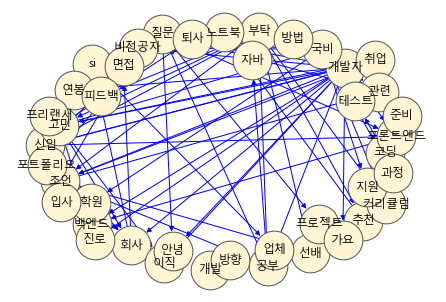

In [11]:
# 폰트 설정을 위한 font_manager import
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# 폰트 설정

font_path = "../inputs/NanumGothic2.ttf"
fontprop= fm.FontProperties(fname=font_path,size=18).get_name()
# fm._rebuild() 

# 네트워크 그래프 그리기
nx.draw(G, 
        # node_size= sizes,
        pos=nx.spring_layout(G,k=100, iterations=FREQ), **options, font_family='Malgun Gothic'
        ) # font_family로 폰트 등록
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()